In [27]:
import numpy as np
import pandas as pd
coins = pd.read_csv('DMCoins.csv')

In [28]:
coinsThreeCent = coins[coins['Denom'] == 'ThreeCent']
coinsThreeCent = coinsThreeCent[['Year', 'Mint_State', 'Value']]

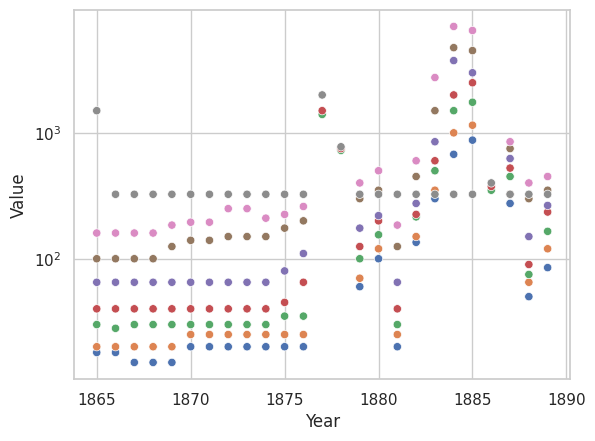

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsThreeCent, hue='Mint_State', legend=False)
plt.yscale('log')

In [30]:
import pandas as pd

df = pd.DataFrame(coinsThreeCent)

# Calculate IQR for the 'Value' column
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on IQR
outliers = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

# Print the rows containing outliers
print("Rows with outliers based on IQR:")
print(df[outliers])

Rows with outliers based on IQR:
      Year     Mint_State   Value
1925  1865          Proof  1500.0
2014  1877          VFine  1400.0
2015  1877          EFine  1500.0
2016  1877          Proof  2000.0
2019  1878          Proof   775.0
2056  1883  AUncirculated   850.0
2057  1883    MintState60  1500.0
2058  1883    MintState63  2750.0
2061  1884          VGood  1000.0
2062  1884          VFine  1500.0
2063  1884          EFine  2000.0
2064  1884  AUncirculated  3750.0
2065  1884    MintState60  4750.0
2066  1884    MintState63  7000.0
2068  1885           Good   875.0
2069  1885          VGood  1150.0
2070  1885          VFine  1750.0
2071  1885          EFine  2500.0
2072  1885  AUncirculated  3000.0
2073  1885    MintState60  4500.0
2074  1885    MintState63  6500.0
2085  1887    MintState63   850.0


In [31]:
indicies = df[outliers].index
indicies = np.array(indicies)
indicies

array([1925, 2014, 2015, 2016, 2019, 2056, 2057, 2058, 2061, 2062, 2063,
       2064, 2065, 2066, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2085])

In [32]:
for i in indicies:
  coinsThreeCent = coinsThreeCent.drop(i)

In [33]:
coinsThreeCent

,Year,Mint_State,Value
1918,1865,Good,18.0
1919,1865,VGood,20.0
1920,1865,VFine,30.0
1921,1865,EFine,40.0
1922,1865,AUncirculated,65.0
...,...,...,...
2098,1889,EFine,235.0
2099,1889,AUncirculated,265.0
2100,1889,MintState60,350.0
2101,1889,MintState63,450.0


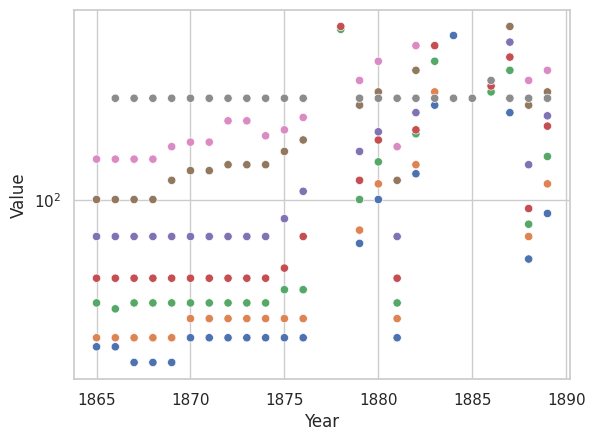

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsThreeCent, hue='Mint_State', legend=False)
plt.yscale('log')

In [35]:
from sklearn.preprocessing import LabelEncoder
lencMS = LabelEncoder()
coinsThreeCent["Mint_State"] = lencMS.fit_transform(coinsThreeCent["Mint_State"])
coinsThreeCent["Mint_State"]

1918    2
1919    7
1920    6
1921    1
1922    0
       ..
2098    1
2099    0
2100    3
2101    4
2102    5
Name: Mint_State, Length: 163, dtype: int64

In [36]:
coinsThreeCent['log_Value'] = np.log(coinsThreeCent['Value'])

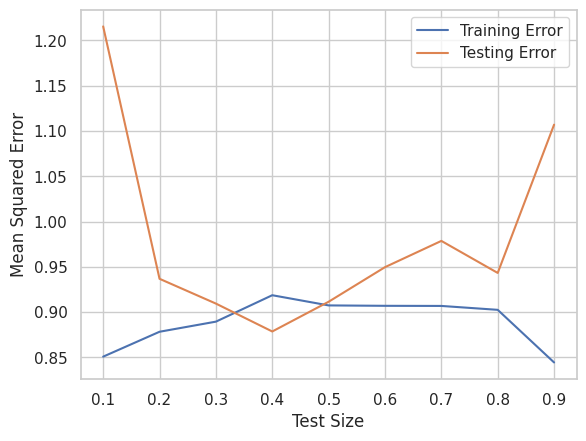

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = coinsThreeCent.iloc[:,0:2]
y = coinsThreeCent.log_Value

# Create a linear regression model
model = LinearRegression()

# Choose a range of test sizes
test_sizes = np.linspace(0.1, 0.9, 9)

# Lists to store training and testing errors for each test size
train_errors = []
test_errors = []

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting the errors
plt.plot(test_sizes, train_errors, label='Training Error')
plt.plot(test_sizes, test_errors, label='Testing Error')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X = coinsThreeCent.iloc[:,0:2]
Y = coinsThreeCent.log_Value

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state=0)

In [39]:
X

,Year,Mint_State
1918,1865,2
1919,1865,7
1920,1865,6
1921,1865,1
1922,1865,0
...,...,...
2098,1889,1
2099,1889,0
2100,1889,3
2101,1889,4


In [40]:
# Use the Linear Regression Model
from sklearn.linear_model import LinearRegression

# Define a linear regression model
reg = LinearRegression()

# Train and fit the training data
reg.fit(x_train , y_train)

# We will measure how well our linear regression works in our x_test split
# predictions are the estimations
log_predictions = reg.predict(x_test)
predictions = np.exp(log_predictions)

In [41]:
from sklearn.metrics import mean_squared_error

# To compare models
mseModel1 = mean_squared_error(y_test, predictions)

In [42]:
mseModel1

22048.686436513635

In [43]:
coefficients = reg.coef_
intercept = reg.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Coefficients: [0.07580546 0.01936248]
Intercept: -137.59895842876733


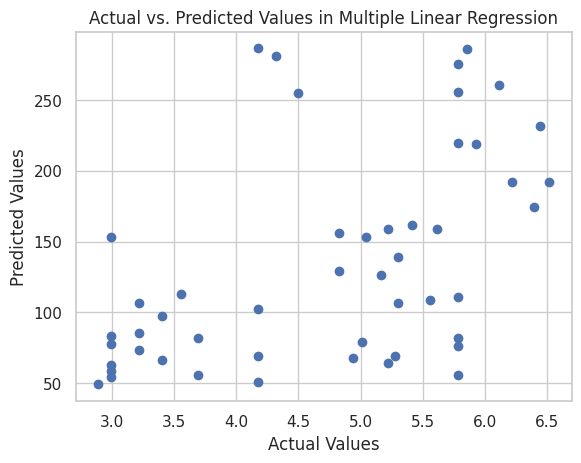

In [44]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in Multiple Linear Regression')
plt.show()

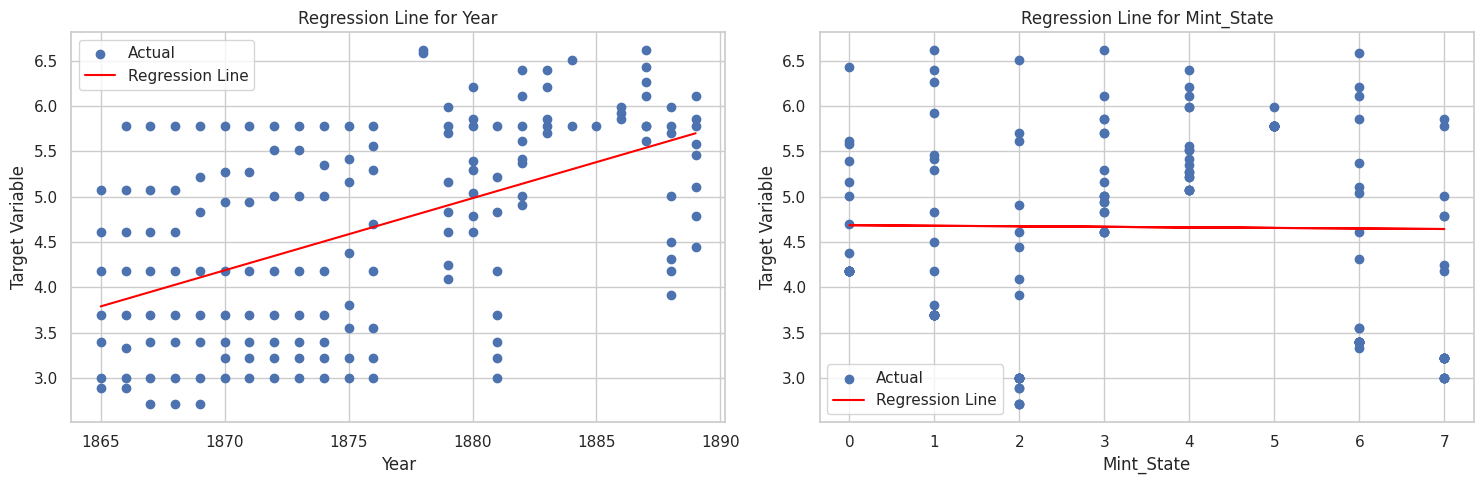

In [45]:
# Create subplots for each independent variable
fig, axs = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))

# Iterate through each independent variable
for i, col in enumerate(X.columns):
    # Extract the independent variable
    x_values = X[col].values.reshape(-1, 1)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x_values, Y)

    # Predict the target variable based on the independent variable
    y_pred = model.predict(x_values)

    # Plot the regression line
    axs[i].scatter(x_values, Y, label='Actual')
    axs[i].plot(x_values, y_pred, color='red', label='Regression Line')
    axs[i].set_title(f'Regression Line for {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Target Variable')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [46]:
coinsThreeCent[coinsThreeCent['Mint_State'] == 7]

,Year,Mint_State,Value,log_Value
1919,1865,7,20.0,2.995732
1927,1866,7,20.0,2.995732
1935,1867,7,20.0,2.995732
1943,1868,7,20.0,2.995732
1951,1869,7,20.0,2.995732
1959,1870,7,25.0,3.218876
1967,1871,7,25.0,3.218876
1975,1872,7,25.0,3.218876
1983,1873,7,25.0,3.218876
1991,1874,7,25.0,3.218876


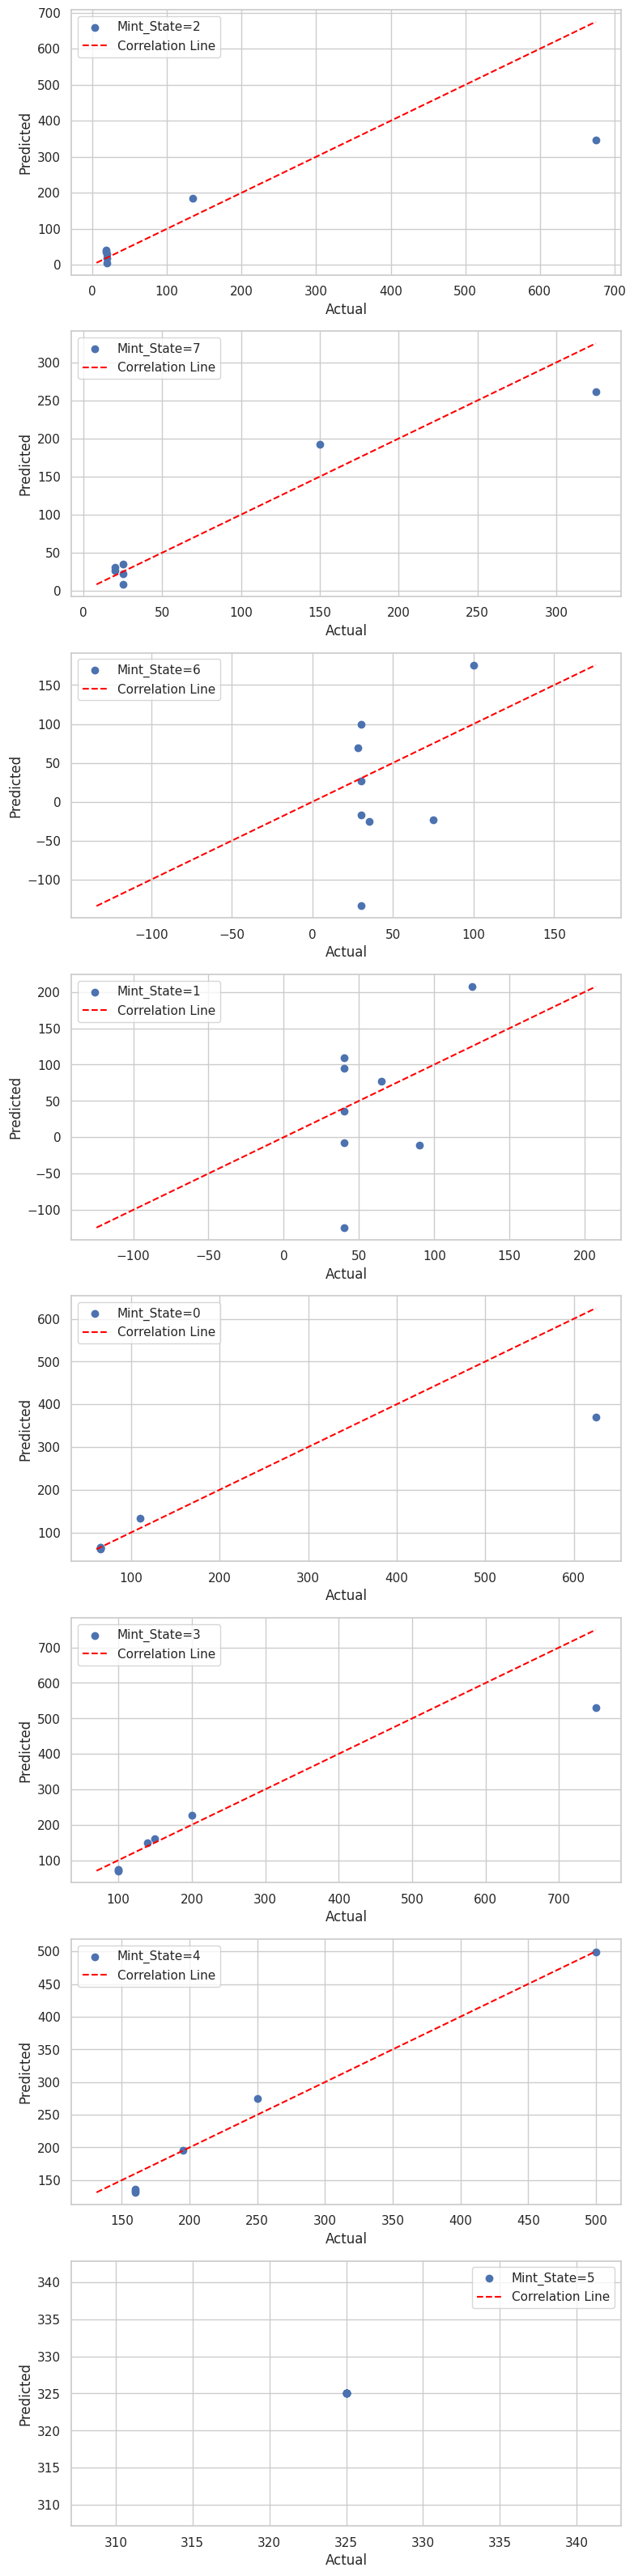

In [47]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
attributes = coinsThreeCent.drop(['Value'], axis=1)  # All columns except the target variable
target_variable = coinsThreeCent['Value']  # Specify the column name of your target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute

# Get unique values of the categorical attribute
unique_values = coinsThreeCent[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows))

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsThreeCent[coinsThreeCent[categorical_attribute] == value]

    # Extract attributes and target variable for the subset
    subset_attributes = subset_data.drop(['Value'], axis=1)
    subset_target = subset_data['Value']

    if len(subset_data) > 1:
      # Split the subset into training and testing sets
      subset_attributes_train, subset_attributes_test, subset_target_train, subset_target_test = train_test_split(
          subset_attributes, subset_target, test_size=0.33, random_state=42
      )

      # Create a linear regression model
      model = LinearRegression()

      # Train the model on the training data subset
      model.fit(subset_attributes_train, subset_target_train)

      # Make predictions on the test data subset
      predictions = model.predict(subset_attributes_test)

      # Plot actual vs. predicted for the current category
      axes[i].scatter(subset_target_test, predictions, label=f'{categorical_attribute}={value}')
      axes[i].set_xlabel('Actual')
      axes[i].set_ylabel('Predicted')
      axes[i].legend()

      # Plot the correlation line
      min_val = min(subset_target_test.min(), predictions.min())
      max_val = max(subset_target_test.max(), predictions.max())
      correlation_line = [min_val, max_val]
      axes[i].plot(correlation_line, correlation_line, linestyle='--', color='red', label='Correlation Line')
      axes[i].legend()
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

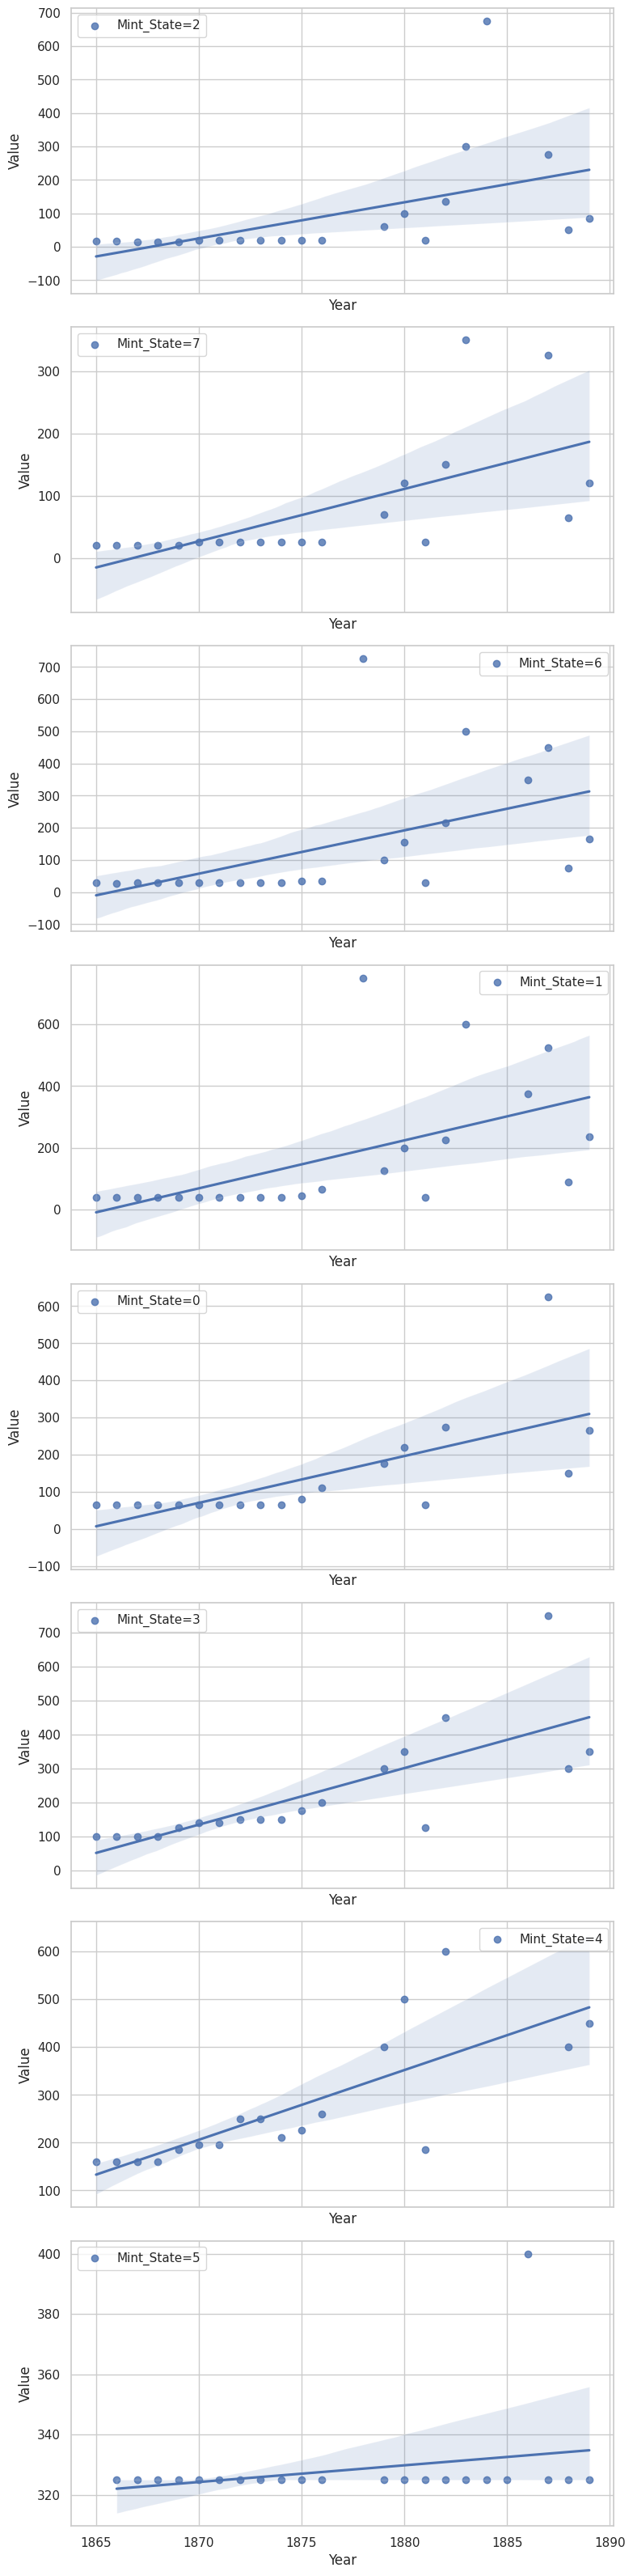

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique values of the categorical attribute
unique_values = coinsThreeCent[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows), sharex=True)

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsThreeCent[coinsThreeCent[categorical_attribute] == value]

    # Plot a scatter plot with a regression line
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], ax=axes[i], label=f'{categorical_attribute}={value}')

    # Set plot labels and title
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(target_variable)
    axes[i].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


                Year  Mint_State     Value  log_Value
Year        1.000000         NaN  0.519375   0.765844
Mint_State       NaN         NaN       NaN        NaN
Value       0.519375         NaN  1.000000   0.879278
log_Value   0.765844         NaN  0.879278   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN  0.644097   0.805162
Mint_State       NaN         NaN       NaN        NaN
Value       0.644097         NaN  1.000000   0.934637
log_Value   0.805162         NaN  0.934637   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN  0.523005   0.728360
Mint_State       NaN         NaN       NaN        NaN
Value       0.523005         NaN  1.000000   0.928248
log_Value   0.728360         NaN  0.928248   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN  0.555802    0.73628
Mint_State       NaN         NaN       NaN        NaN
Value       0.555802        

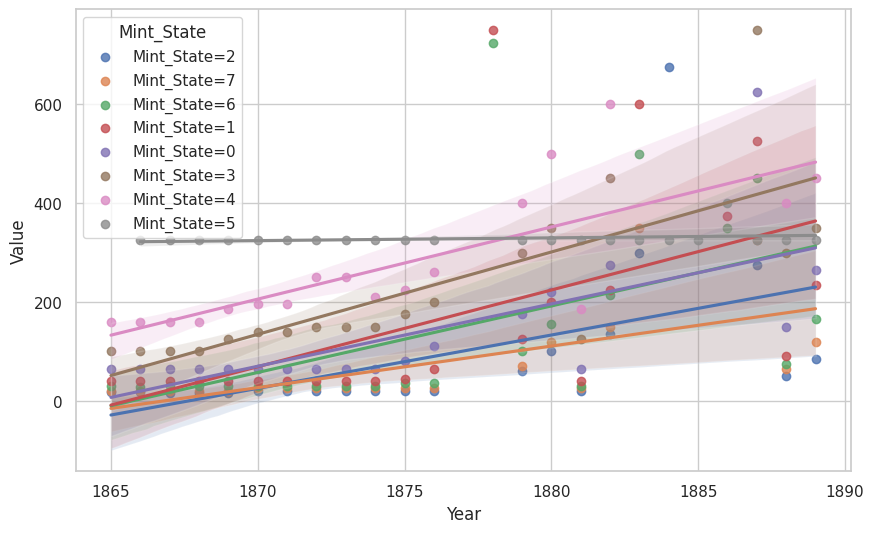

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsThreeCent[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsThreeCent[coinsThreeCent[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

    print(subset_data.corr())

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

In [50]:
overall_correlation_matrix = coinsThreeCent.corr()
overall_correlation_matrix

,Year,Mint_State,Value,log_Value
Year,1.000000,0.023399,0.502599,0.525859
Mint_State,0.023399,1.000000,0.035372,-0.012484
Value,0.502599,0.035372,1.000000,0.899304
log_Value,0.525859,-0.012484,0.899304,1.000000


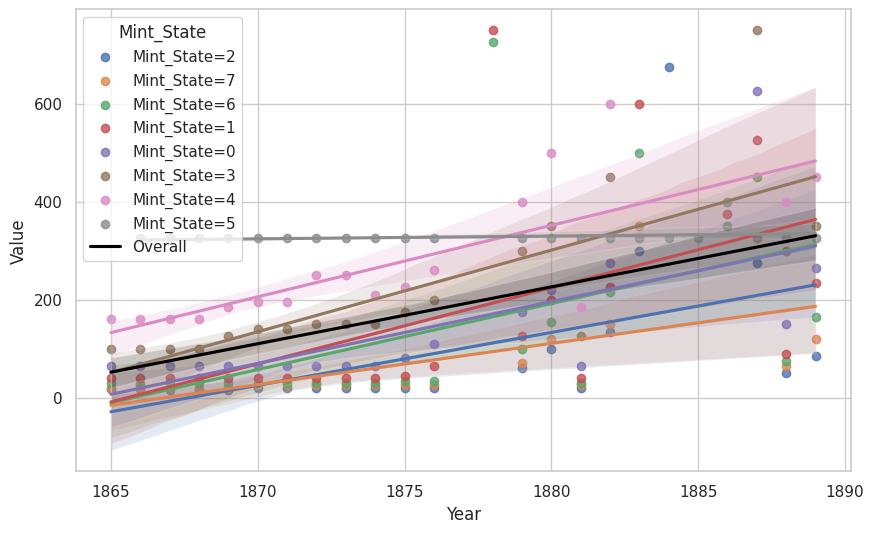

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsThreeCent[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsThreeCent[coinsThreeCent[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsThreeCent[attribute_column], y=coinsThreeCent[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

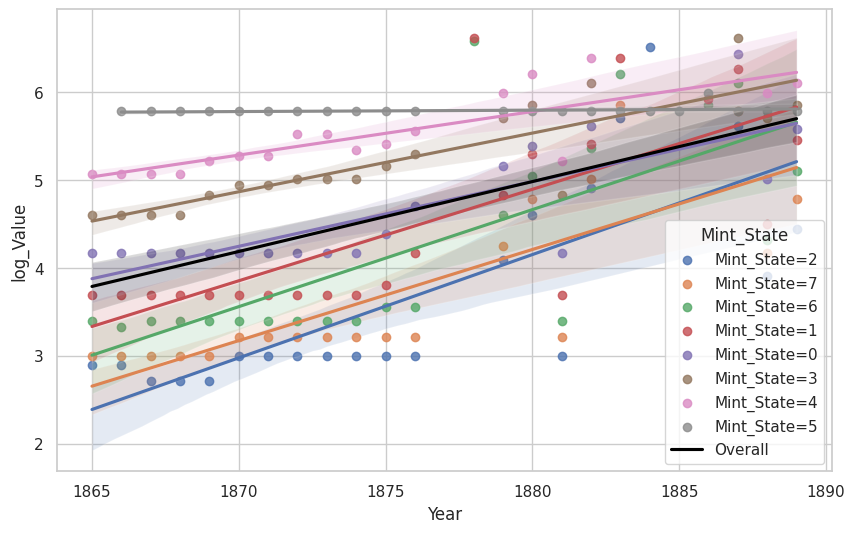

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'log_Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsThreeCent[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsThreeCent[coinsThreeCent[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsThreeCent[attribute_column], y=coinsThreeCent[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()